<a href="https://colab.research.google.com/github/rajatenzyme/EfficientNet-Cifar10/blob/main/EfficientNetv1_B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

you are requested to train refficientNET v1 and V2 all models on CIFaR 10 dataset

https://keras.io/api/applications/


And 
ResNeXT on cifar10 , link for you to understand

https://medium.com/dataseries/enhancing-resnet-to-resnext-for-image-classification-3449f62a774c

Youvare free to use any thing pytorch, keras -tensorflow

Ensure to keep the epochs same while training.
Ensure to save models
Ensure to plot save the accuracy and loss curve 
You can use collab to do this 

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.models import Input
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
def model_dense(image_shape=(32,32,3)):
    in_src = Input(shape=image_shape)
    #d = BatchNormalization()(in_src)
    m = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(32,32,3))(in_src)
    #Here I am making all the layer of the last layer to be non trainable
   # for layer in m.layers[:len(m.layers)-46]:
   #     layer.trainable = False
    #x = tf.keras.layers.GlobalMaxPool2D()(model)
    x = tf.keras.layers.GlobalAveragePooling2D()(m)
    #x = Flatten()(model)
    x = Dense(2048,activation='relu')(x)
    #x = Dropout(0.3)(x, training=True)
    x = Dense(1024,activation='relu')(x)
    #x = Dropout(0.3)(x, training=True)
    x = Dense(10, activation='softmax')(x)
    model = Model(in_src,x)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = model_dense()

16719872/16705208 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2048)              2623488   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                             

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test,y_test),
        batch_size=32,
        epochs=10,
        shuffle=True,
    )

Epoch 1/10
1563/1563 [==============================] - 140s 74ms/step - loss: 1.1526 - accuracy: 0.5952 - val_loss: 0.7661 - val_accuracy: 0.7343
Epoch 2/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.7612 - accuracy: 0.7357 - val_loss: 0.6434 - val_accuracy: 0.7758
Epoch 3/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.6235 - accuracy: 0.7833 - val_loss: 0.5827 - val_accuracy: 0.8044
Epoch 4/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.5262 - accuracy: 0.8166 - val_loss: 0.5709 - val_accuracy: 0.8103
Epoch 5/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.4596 - accuracy: 0.8394 - val_loss: 0.5471 - val_accuracy: 0.8197
Epoch 6/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.3951 - accuracy: 0.8628 - val_loss: 0.5631 - val_accuracy: 0.8211
Epoch 7/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.3499 - accuracy: 0.8786 - val_loss: 0

In [ ]:
model.save("cifar_e0.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


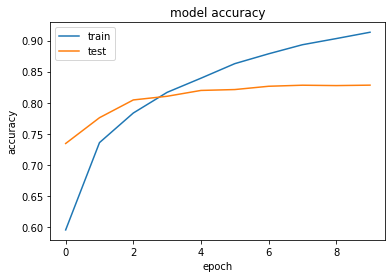

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("image_test.jpg")
plt.show()
